In [1]:
# Step 1: import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# make plots appear inside notebook
%matplotlib inline

# make pandas show all columns when we print
pd.set_option('display.max_columns', None)


In [3]:
# Step 2: Load the dataset
df = pd.read_csv(r"C:\Users\ALISHIBA GHATAGE\OneDrive\Documents\credit-card-fraud\data\creditcard.csv")

# Display first 5 rows
df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Step 3: Explore the dataset

# Shape of the data (rows, columns)
print("Dataset shape:", df.shape)

# Basic info about columns and data types
print("\nDataset info:")
print(df.info())

# Quick statistics summary
print("\nStatistical summary:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Count how many transactions are fraud vs not fraud
print("\nClass distribution:")
print(df['Class'].value_counts())

# Show percentage of fraud transactions
fraud_percentage = (df['Class'].value_counts()[1] / len(df)) * 100
print(f"\nPercentage of fraudulent transactions: {fraud_percentage:.4f}%")


Dataset shape: (284807, 31)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20  

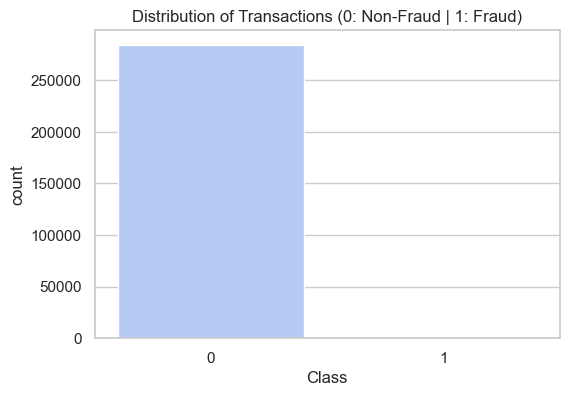

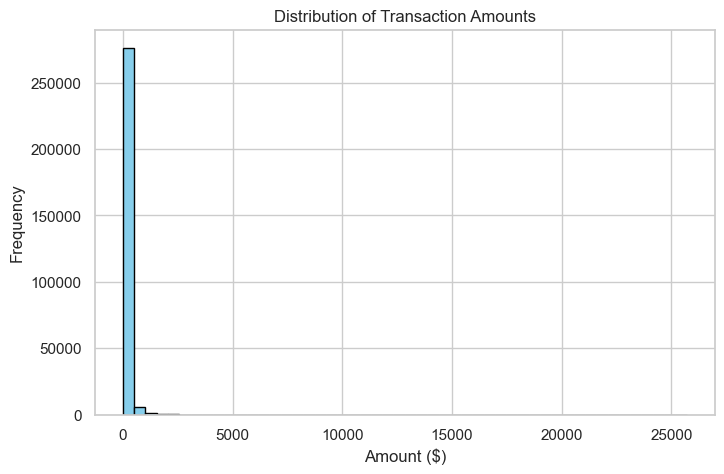

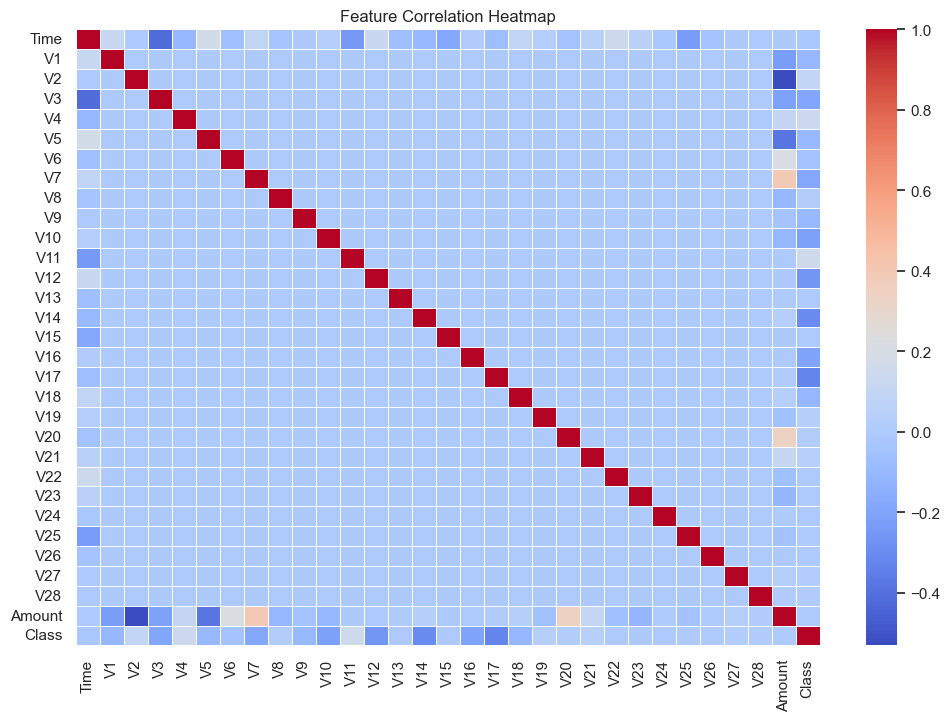

In [6]:
# Step 4: Visualize the data

import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set(style="whitegrid")

# 1️⃣ Plot count of fraud vs non-fraud
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title('Distribution of Transactions (0: Non-Fraud | 1: Fraud)')
plt.show()

plt.figure(figsize=(8,5))
plt.hist(df['Amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.show()


# 3️⃣ Correlation heatmap (how features relate to each other)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [7]:
# Step 5.1 — Check for missing or null values
print("Missing values in each column:\n", df.isnull().sum())

# Just to confirm dataset shape again
print("\nDataset shape:", df.shape)


Missing values in each column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Dataset shape: (284807, 31)


In [8]:
from sklearn.preprocessing import StandardScaler

# Step 5.2 — Scale 'Amount' and 'Time'
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_Scaled'] = scaler.fit_transform(df[['Time']])

# Drop the original columns to avoid duplication
df = df.drop(['Amount', 'Time'], axis=1)

# Show the new data
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled,Time_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [9]:
from sklearn.model_selection import train_test_split

# Step 5.3 — Split into features (X) and labels (y)
X = df.drop('Class', axis=1)  # all columns except 'Class'
y = df['Class']               # the target column

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (227845, 30)
Testing data shape: (56962, 30)


In [10]:
from sklearn.linear_model import LogisticRegression

# Step 6 — Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)

# Fit the model on training data
model.fit(X_train, y_train)

print("✅ Model training completed successfully!")


✅ Model training completed successfully!


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 7 — Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("✅ Model Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Model Evaluation Results:
Accuracy: 0.9991222218320986

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56855     9]
 [   41    57]]


In [12]:
# Step 8: Train a Random Forest Classifier (Better Model)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
print("✅ Random Forest Model Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))


✅ Random Forest Model Evaluation Results:
Accuracy: 0.9995611109160493

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56860     4]
 [   21    77]]


In [13]:
import joblib

# Step 9 — Save the trained Random Forest model
joblib.dump(rf_model, '../models/credit_card_fraud_model.pkl')

print("✅ Model saved successfully at: models/credit_card_fraud_model.pkl")


✅ Model saved successfully at: models/credit_card_fraud_model.pkl


In [14]:
# Step 10 — Load the saved model and test it
loaded_model = joblib.load('../models/credit_card_fraud_model.pkl')

# Make a quick test prediction
sample = X_test.iloc[0:1]  # take one sample from test data
prediction = loaded_model.predict(sample)

print("✅ Sample Prediction (0 = Non-Fraud, 1 = Fraud):", prediction)


✅ Sample Prediction (0 = Non-Fraud, 1 = Fraud): [1]


 Project Title: Credit Card Fraud Detection using Machine Learning

 Objective
The goal of this project is to build a machine learning model that detects fraudulent credit card transactions.

Dataset:

Source: Kaggle Credit Card Fraud Dataset

Contains 284,807 transactions

Features include Time, Amount, and V1–V28 (PCA transformed features)

Class 0 = Non-Fraud, 1 = Fraud

 Steps Performed

Imported essential Python libraries (pandas, numpy, matplotlib, seaborn)

Loaded and explored the dataset

Checked for missing values and class imbalance

Scaled the data using StandardScaler

Split data into training and testing sets

Trained models:

Logistic Regression

Random Forest Classifier

Compared performance metrics (accuracy, precision, recall, F1-score)

Saved the trained model as credit_card_fraud_model.pkl using joblib

| Model               | Accuracy   | Precision (Fraud) | Recall (Fraud) | F1-score (Fraud) |
| ------------------- | ---------- | ----------------- | -------------- | ---------------- |
| Logistic Regression | 0.9991     | 0.86              | 0.58           | 0.70             |
| Random Forest       | **0.9995** | **0.95**          | **0.79**       | **0.86**         |

✅ Random Forest performed better in detecting fraudulent transactions.

 Conclusion:

The Random Forest model effectively detects credit card fraud with high accuracy.
It helps financial institutions minimize losses by flagging suspicious transactions.

Tools & Libraries Used:

Python

Pandas, NumPy

Matplotlib, Seaborn

Scikit-learn

Joblib

Future Improvements:

Use SMOTE for balancing classes

Try advanced models (XGBoost, LightGBM)

Deploy model using Flask or Streamlit web app